In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
billingRaw = pd.read_csv('../Dataset/billing.csv')
eventsRaw = pd.read_csv('../Dataset/events.csv')
sessionsRaw = pd.read_csv('../Dataset/sessions.csv')
usersRaw = pd.read_csv('../Dataset/users.csv')

In [24]:
billingRaw[:5]

,user_id,month,plan_tier,active_seats,mrr,discount_applied,invoices_overdue,support_ticket_count
0,f94d1824-8742-4000-8b6d-39d70958490b,2024-05,free,2,0.0,0,0,0
1,f94d1824-8742-4000-8b6d-39d70958490b,2024-06,free,2,0.0,0,0,0
2,f94d1824-8742-4000-8b6d-39d70958490b,2024-07,free,1,0.0,0,0,0
3,f94d1824-8742-4000-8b6d-39d70958490b,2024-08,free,1,0.0,0,0,0
4,f94d1824-8742-4000-8b6d-39d70958490b,2024-09,free,1,0.0,0,0,0


In [26]:
billingRaw.loc[billingRaw['plan_tier'] == 'free', billingRaw.columns[2]] = 0
billingRaw.loc[billingRaw['plan_tier'] == 'standard', billingRaw.columns[2]] = 1
billingRaw.loc[billingRaw['plan_tier'] == 'premium', billingRaw.columns[2]] = 2
billingRaw['plan_tier'] = pd.to_numeric(billingRaw['plan_tier'], errors='coerce')

In [28]:
billingRaw[:5]

,user_id,month,plan_tier,active_seats,mrr,discount_applied,invoices_overdue,support_ticket_count
0,f94d1824-8742-4000-8b6d-39d70958490b,2024-05,0,2,0.0,0,0,0
1,f94d1824-8742-4000-8b6d-39d70958490b,2024-06,0,2,0.0,0,0,0
2,f94d1824-8742-4000-8b6d-39d70958490b,2024-07,0,1,0.0,0,0,0
3,f94d1824-8742-4000-8b6d-39d70958490b,2024-08,0,1,0.0,0,0,0
4,f94d1824-8742-4000-8b6d-39d70958490b,2024-09,0,1,0.0,0,0,0


In [30]:
billingRaw['month'] = pd.to_datetime(billingRaw['month'], format = '%Y-%m')

In [32]:
type(billingRaw['month'])

pandas.core.series.Series

In [34]:
billingRaw

,user_id,month,plan_tier,active_seats,mrr,discount_applied,invoices_overdue,support_ticket_count
0,f94d1824-8742-4000-8b6d-39d70958490b,2024-05-01,0,2,0.0,0,0,0
1,f94d1824-8742-4000-8b6d-39d70958490b,2024-06-01,0,2,0.0,0,0,0
2,f94d1824-8742-4000-8b6d-39d70958490b,2024-07-01,0,1,0.0,0,0,0
3,f94d1824-8742-4000-8b6d-39d70958490b,2024-08-01,0,1,0.0,0,0,0
4,f94d1824-8742-4000-8b6d-39d70958490b,2024-09-01,0,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...
1000171,2bebcb3d-bead-492a-97e3-1346173ee638,2025-03-01,0,4,0.0,0,0,0
1000172,2bebcb3d-bead-492a-97e3-1346173ee638,2025-04-01,0,2,0.0,0,0,0
1000173,2bebcb3d-bead-492a-97e3-1346173ee638,2025-05-01,0,2,0.0,0,0,0
1000174,2bebcb3d-bead-492a-97e3-1346173ee638,2025-06-01,0,3,0.0,0,0,0


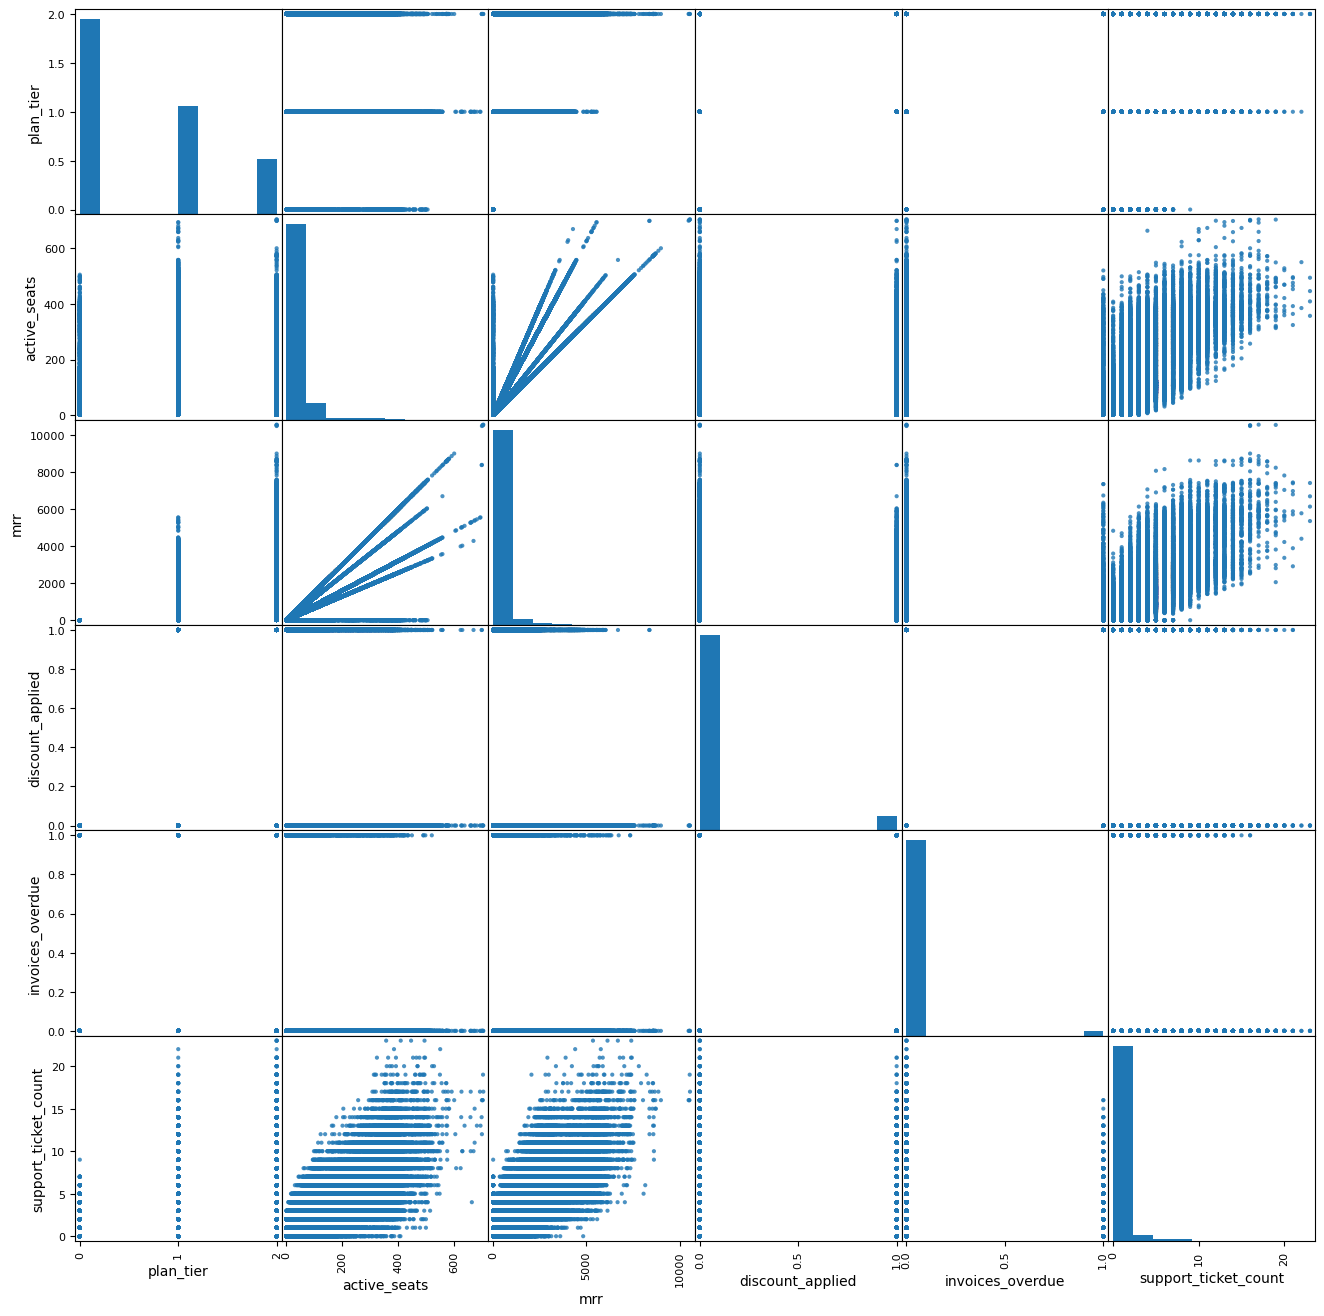

In [36]:
pd.plotting.scatter_matrix(billingRaw, alpha=0.8, figsize=(16, 16), diagonal='hist');

In [88]:
upgrade_df = billingRaw.groupby('user_id')['plan_tier'].agg(['first', 'last']).reset_index()
upgrade_df['upgrade'] = (upgrade_df['last'] > upgrade_df['first']).astype(int)
upgrade_df.loc[upgrade_df['last'] < upgrade_df['first'], 'upgrade'] = -1
upgrade_df = upgrade_df.drop(['first', 'last'], axis = 1)

In [94]:
upgrade_df

,user_id,upgrade
0,0000093e-7258-43c0-b212-ea7212795ddf,0
1,0003c565-9352-45aa-a448-82b91e57b043,0
2,00044174-f9c1-4412-b9ca-584a21903f92,0
3,0005523a-ffde-4fe8-96d8-c203b1fe2f97,0
4,0006fdbd-c35d-4c0d-a948-e8ee10f279d5,0
...,...,...
99995,fffa9cdd-f19a-4849-ae3b-2302b5b68020,0
99996,fffcb715-b3de-4a0e-813a-df5dd2f833d2,0
99997,fffce54a-cd86-4f93-b529-d92586690bd5,0
99998,fffe77cc-44fd-401f-8fdd-9fa06afc6bc8,0


In [96]:
upgrade_df['upgrade'].value_counts()

upgrade
 0    95170
 1     2848
-1     1982
Name: count, dtype: int64